Analisis de los datos del supermercado Carrefour

Preguntas a responder:
- ¿Cuáles son los productos que más cambian de precio según el día de la semana?
- ¿Existe un patrón de precios por región? (ejemplo: regiones o grupos de provincias 
    del país con precios muy elevados) Elegir alguna de las
- ¿Las marcas propias de los supermercados tienen precios más bajos que las marcas cadenas grandes delíderes supermercado
- ¿Los precios de los productos esenciales (ejemplo: leche, pan, arroz) varían dependiendo 
    (Carrefour, Disco,del día de la semana? etc.)
- ¿Cómo influye el tipo de comercio (hipermercado, autoservicio, etc.) en los precios 
    de los productos?

Preguntas propias:
- Cuales son las marcas que tienen mayor visibilidad en los diferentes mercados?
- Que tipos de poductos son los que prefiere el mercado Argentino


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [16]:
# Carga de los datos 
file_path = 'datos/sepa_1_comercio-sepa-10_2025-03-07_09-05-11/'
productos_df = pd.read_csv('datos/sepa_1_comercio-sepa-10_2025-03-07_09-05-11/productos.csv', sep='|')
productos_df.head()

/tmp/ipykernel_82872/1981384237.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  productos_df = pd.read_csv('datos/sepa_1_comercio-sepa-10_2025-03-07_09-05-11/productos.csv', sep='|')


,id_comercio,id_bandera,id_sucursal,id_producto,productos_ean,productos_descripcion,productos_cantidad_presentacion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1,productos_precio_unitario_promo2,productos_leyenda_promo2
0,10,1.0,63.0,7.790771e+12,1.0,TOALLA NOSOTRAS CLASICAS C CALENDULA X 16U,1.0,UNI,NOSOTRAS,2629.0,164.31,16.0,UNI,NaN,NaN,NaN,NaN
1,10,3.0,711.0,7.790070e+12,1.0,FIDEOS DEDALITOS LUCCHETTI BOLSA X 500 GRS,1.0,UNI,LUCCHETTI,1339.0,2678.00,500.0,GRM,NaN,NaN,NaN,NaN
2,10,1.0,44.0,7.622202e+12,1.0,GALLETITAS BOCA DE DAMA TERRABUSI X 170 GRS,1.0,UNI,TERRABUSI,959.0,5641.18,170.0,GRM,NaN,NaN,NaN,NaN
3,10,2.0,62.0,7.791293e+12,1.0,ACONDICIONADOR LISO EFECTO BOTOX TRESEMME X 25...,1.0,UNI,TRESEMME,3969.0,15876.00,250.0,CM3,NaN,NaN,NaN,NaN
4,10,1.0,2.0,7.791720e+12,1.0,ANANA EN RODAJAS BULNEZ LATA X 825 GRS,1.0,UNI,BULNEZ,3450.0,4181.82,825.0,GRM,NaN,NaN,NaN,NaN


In [8]:
# productos sin promociones
productos_sp_df = productos_df[productos_df['productos_precio_unitario_promo1'].isnull() & productos_df['productos_precio_unitario_promo2'].isnull()]

# productos con valor en promo1
productos_p1_df = productos_df.dropna(subset=['productos_precio_unitario_promo1'])

# productos con valor en promo2
productos_p2_df = productos_df.dropna(subset=['productos_precio_unitario_promo2'])



In [ ]:
productos_sp_df = productos_sp_df.drop(2180654)

In [ ]:
print(f"Longitud de productos_sp_df: {len(productos_sp_df)}, productos_p1_df: {len(productos_p1_df)}, productos_p2_df: {len(productos_p2_df)}")

Longitud de productos_sp_df: 2097284, productos_p1_df: 83370, productos_p2_df: 0


In [ ]:
print(f"nulos en productos_sp_df: {productos_sp_df['productos_precio_lista'].isnull().sum()}, productos_p1_df: {productos_p1_df['productos_precio_unitario_promo1'].isnull().sum()}, productos_p2_df: {productos_p2_df['productos_precio_unitario_promo2'].isnull().sum()}")


nulos en productos_sp_df: 0, productos_p1_df: 0, productos_p2_df: 0


In [ ]:
pd.set_option('display.float_format', lambda x: '%.10f' % x)
print(productos_df[['productos_precio_lista', 'productos_precio_unitario_promo1', 'productos_precio_unitario_promo2']].describe())

       productos_precio_lista  productos_precio_unitario_promo1  \
count      2180654.0000000000                  83370.0000000000   
mean          9957.3120879378                  82496.4498017273   
std          80662.8545178933                 280742.6283659636   
min             10.0000000000                     45.0000000000   
25%           1550.0000000000                   1090.0000000000   
50%           2649.0000000000                   2190.0000000000   
75%           4930.0000000000                   5990.0000000000   
max        7300000.0000000000                4905000.0000000000   

       productos_precio_unitario_promo2  
count                      0.0000000000  
mean                                NaN  
std                                 NaN  
min                                 NaN  
25%                                 NaN  
50%                                 NaN  
75%                                 NaN  
max                                 NaN  


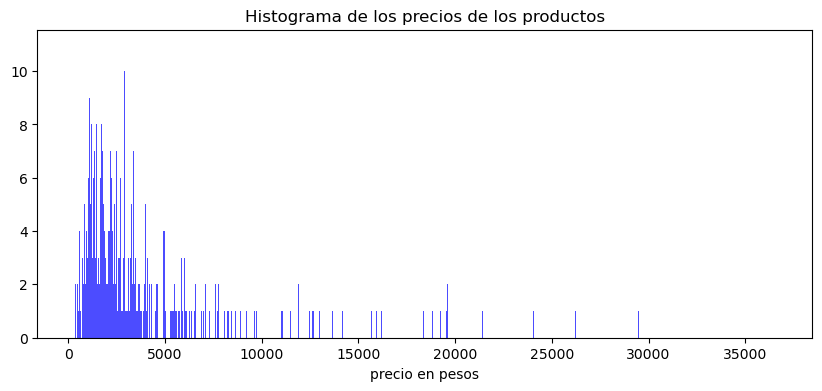

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))

subset = productos_df['productos_precio_lista'][0:500]
subset2 = subset[subset<50000]
ax.hist(subset2, bins=1000, color='blue', alpha=0.7)

ax.set_title('Histograma de los precios de los productos')
ax.set_xlabel('precio en pesos')
plt.show()

se observa una acumulacion de valores entre 0 y 5000 pesos, ademas de una enorme dispersion de los datos dado que los productos no comparten precios iguales pero si cercanos 

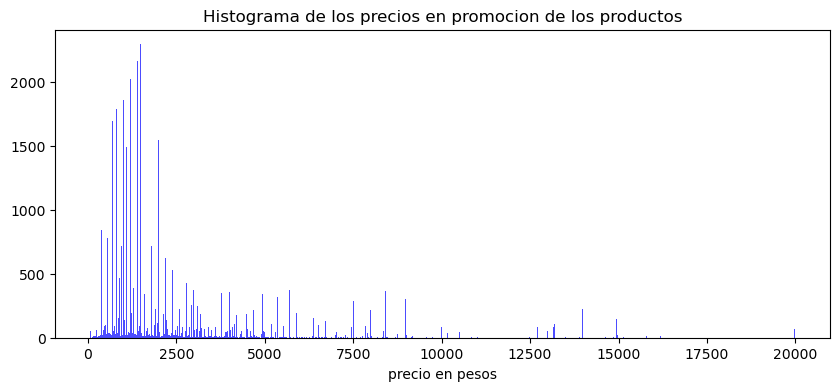

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))

subset = productos_p1_df['productos_precio_unitario_promo1'][0:50000]
subset2 = subset[subset<20000]
ax.hist(subset2, bins=1000, color='blue', alpha=0.7)

ax.set_title('Histograma de los precios en promocion de los productos')
ax.set_xlabel('precio en pesos')
plt.show()

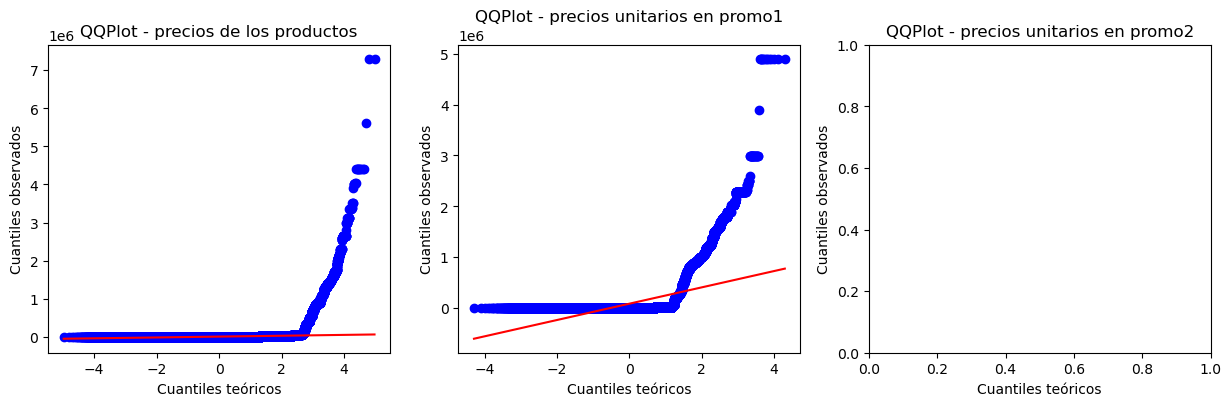

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

st.probplot(productos_sp_df['productos_precio_lista'], dist='norm', plot=ax[0])

ax[0].set_title("QQPlot - precios de los productos")
ax[0].set_xlabel("listado de precios")
ax[0].set_ylabel("Cuantiles observados")

st.probplot(productos_p1_df['productos_precio_unitario_promo1'], dist='norm', plot=ax[1])
ax[1].set_title("QQPlot - precios unitarios en promo1")
ax[1].set_xlabel("precios promocion 1")
ax[1].set_ylabel("Cuantiles observados")

st.probplot(productos_p2_df['productos_precio_unitario_promo2'], dist='norm', plot=ax[2])
ax[2].set_title("QQPlot - precios unitarios en promo2")
ax[2].set_xlabel("precios promocion 2")
ax[2].set_ylabel("Cuantiles observados")


plt.show()

In [5]:
def poner_fecha(df, file_path):
    date_string = file_path.split('_')[-2]
    date_obj = pd.to_datetime(date_string)
    df['fecha'] = date_obj

def crear_categoria(df):
    df['categoria'] = df['productos_descripcion'].apply(lambda x: str(x).split()[0].lower())

In [3]:
viernes_path = 'datos/Sepa_semana_3/sepa_viernes/sepa_2_comercio-sepa-10_2025-03-21_01-05-08/productos.csv'
viernes_df = pd.read_csv(viernes_path, sep='|')

jueves_path = 'datos/Sepa_semana_3/sepa_jueves/sepa_2_comercio-sepa-10_2025-03-20_01-05-07/productos.csv'
jueves_df = pd.read_csv(jueves_path, sep='|')

miercoles_path = 'datos/Sepa_semana_3/sepa_miercoles/sepa_2_comercio-sepa-10_2025-03-19_01-05-08/productos.csv'
miercoles_df = pd.read_csv(miercoles_path, sep='|')

martes_path = 'datos/Sepa_semana_3/sepa_martes/sepa_2_comercio-sepa-10_2025-03-18_01-06-06/productos.csv'
martes_df = pd.read_csv(martes_path, sep='|')

lunes_path = 'datos/Sepa_semana_3/sepa_lunes/2025-03-24/sepa_1_comercio-sepa-10_2025-03-24_09-05-11/productos.csv'
lunes_df = pd.read_csv(lunes_path, sep='|')

/tmp/ipykernel_60873/1876605330.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  viernes_df = pd.read_csv(viernes_path, sep='|')
/tmp/ipykernel_60873/1876605330.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  jueves_df = pd.read_csv(jueves_path, sep='|')
/tmp/ipykernel_60873/1876605330.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  miercoles_df = pd.read_csv(miercoles_path, sep='|')
/tmp/ipykernel_60873/1876605330.py:11: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  martes_df = pd.read_csv(martes_path, sep='|')
/tmp/ipykernel_60873/1876605330.py:14: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  lunes_df = pd.read_csv(lunes_path, sep='|')


In [32]:
poner_fecha(lunes_df, lunes_path)
poner_fecha(martes_df, martes_path)
poner_fecha(miercoles_df, miercoles_path)
poner_fecha(jueves_df, jueves_path)
poner_fecha(viernes_df, viernes_path)

crear_categoria(lunes_df)
crear_categoria(martes_df)
crear_categoria(miercoles_df)   
crear_categoria(jueves_df)
crear_categoria(viernes_df)

In [33]:
semana3_df = pd.concat([lunes_df, martes_df, miercoles_df, jueves_df, viernes_df], ignore_index=True)
semana3_df.iloc[0]

id_comercio                                                                     10
id_bandera                                                                     1.0
id_sucursal                                                                   63.0
id_producto                                                        7790770601899.0
productos_ean                                                                  1.0
productos_descripcion                   TOALLA NOSOTRAS CLASICAS C CALENDULA X 16U
productos_cantidad_presentacion                                                1.0
productos_unidad_medida_presentacion                                           UNI
productos_marca                                                           NOSOTRAS
productos_precio_lista                                                      2629.0
productos_precio_referencia                                                 164.31
productos_cantidad_referencia                                                 16.0
prod

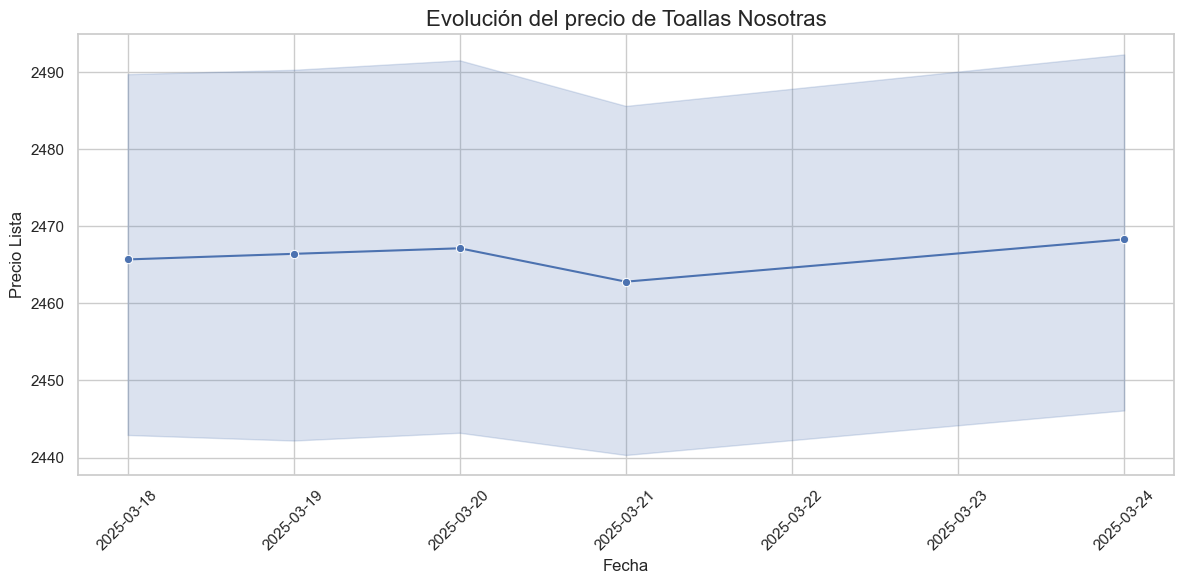

In [31]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

precios_toallas_nosotras = semana3_df[semana3_df['id_producto'] == 7790770601899.0].loc[:, ['id_sucursal','productos_descripcion', 'fecha', 'productos_precio_lista']]
sns.lineplot(data=precios_toallas_nosotras, x='fecha', y='productos_precio_lista', marker='o')

plt.title('Evolución del precio de Toallas Nosotras', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio Lista', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:

# agrupacion de los productos por id, sin considerar fecha ni sucursal
semana3_df['cambio_precio'] = semana3_df.groupby('id_producto')['productos_precio_lista'].diff().ne(0)


# conteo de cuantas veces cambió el precio
cambios_precios_df = semana3_df.groupby('id_producto', as_index=False).agg({
    'productos_descripcion': 'first',
    'cambio_precio': 'sum',
    'categoria':'first'
})
cambios_precios_df.rename(columns={'cambio_precio': 'conteo_cambios'}, inplace=True)


In [37]:
cambios_precios_df.describe()

,id_producto,conteo_cambios
count,1.599900e+04,15999.000000
mean,6.890417e+12,270.829552
std,2.118435e+12,387.558878
min,4.008411e+07,1.000000
25%,7.790070e+12,1.000000
50%,7.791720e+12,120.000000
75%,7.798033e+12,359.000000
max,9.002490e+12,2055.000000


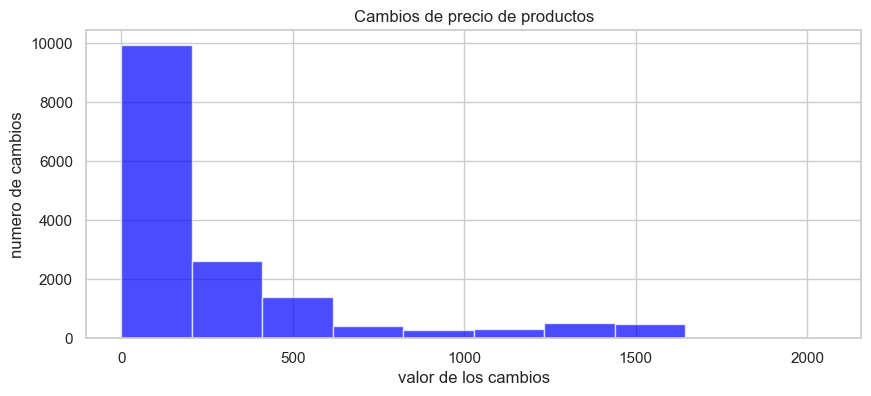

In [62]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.hist(cambios_precios_df['conteo_cambios'], bins=10, color='blue', alpha=0.7)

ax.set_title('Cambios de precio de productos')
ax.set_ylabel('numero de cambios')
ax.set_xlabel('valor de los cambios')
plt.show()

In [ ]:
cambios_precios_df.sort_values('conteo_cambios', ascending=False).head(10)

,id_producto,productos_descripcion,conteo_cambios,categoria
7116,7.791291e+12,CANASTA P INODORO PODER X 6 CITRUS VIM X 55 GRS,2055,canasta
7118,7.791291e+12,LIMPIADOR CREMOSO BIOACTIVE ORIGINAL CIF X 250 CC,2018,limpiador
7287,7.791293e+12,ACONDICIONADOR CARBON Y PEONIAS SEDAL X 340 CC,1967,acondicionador
7290,7.791293e+12,SHAMPOO CARBON Y PEONIAS SEDAL X 340 CC,1944,shampoo
9834,7.792931e+12,AGUA MINERAL S GAS BAJO SODIO GLACIAR PET X 50...,1855,agua
11070,7.794940e+12,EDULCORANTE LIQUIDO C STEVIA HILERET PET X 200 CC,1758,edulcorante
130,7.860003e+07,PASTILLAS SABOR NARANJA TIC TAC X 16 GRS,1717,pastillas
5001,7.790388e+12,TE EN SAQUITOS DIAMANTADO TARAGUI X 50 UNI,1645,te
3676,7.790040e+12,GALLETITAS CHOCOLATE NEGRO CHOCOLINAS X 258 GRS,1640,galletitas
9836,7.792931e+12,AGUA MINERAL S GAS BAJO SODIO GLACIAR PET X 2 LT,1638,agua


In [72]:
productos_min_cambios = cambios_precios_df[cambios_precios_df['conteo_cambios'] <= 5]
productos_min_cambios



,id_producto,productos_descripcion,conteo_cambios,categoria
12,7.730955e+07,REQUESON CREMOSO CONAPROLE FRASCO X 250 GRS,1,requeson
13,7.730956e+07,REQUESON LIGHT CONAPROLE FRASCO X 250 GRS,1,requeson
35,7.791931e+07,BARRA ARROZ BANADA CHOC BLAN LULEMUU PAQUETE X...,5,barra
36,7.791933e+07,BARRA DE ARROZ YOGURT LULEMUU PAQUETE X 12 GR,1,barra
37,7.791934e+07,BARRA DE ARROZ DULCE DE LECHE LULEMUU PAQUETEX...,1,barra
...,...,...,...,...
15978,8.806098e+12,MICROONDAS INV GRILL 42L LG MH8298DIR,1,microondas
15990,8.906039e+12,CEPILLO BAMBU CERDAS DURA SUDANTA SRISRI X 1 UNI,1,cepillo
15994,8.992742e+12,GOMITAS BURGER GUMMI ZONE X 9 GRS,1,gomitas
15995,8.992742e+12,GOMITAS DOGGIE GUMMI ZONE X 9 GRS,1,gomitas


In [73]:
productos_max_cambios = cambios_precios_df[cambios_precios_df['conteo_cambios'] >= 1500]
productos_max_cambios


,id_producto,productos_descripcion,conteo_cambios,categoria
95,7.797624e+07,ANTITRANSPIRANTE ROLL ON ORIGINAL DOVE X 50 CC,1544,antitranspirante
130,7.860003e+07,PASTILLAS SABOR NARANJA TIC TAC X 16 GRS,1717,pastillas
2574,5.000267e+12,WHISKY IMPORTADO RED LABEL JOHNNIE WALKER X 75...,1570,whisky
2576,5.000267e+12,WHISKY IMPORTADO BLACK JOHNNIE WALKER X 750 CC.,1524,whisky
2581,5.000281e+12,GIN TANQUERAY X 700 CC,1509,gin
...,...,...,...,...
15448,7.896004e+12,COPOS DE MAIZ AZUCARADOS ZUCARITAS X 240 GRS,1526,copos
15679,8.445290e+12,LECHE EN POLVO DESCREMADA ORGANICA SVELTY X 37...,1503,leche
15689,8.445291e+12,CACAO EN POLVO MENOS AZUCAR NESQUIK X 300 GRS,1518,cacao
15740,8.445291e+12,PURE DE PAPAS CREMOSO ORIGINAL MAGGI X 125 GRS,1519,pure
